In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from sklearn import datasets
linnerud = datasets.load_linnerud()
dfexercise = pd.DataFrame(linnerud.data, columns = linnerud.feature_names)
dfphysiology = pd.DataFrame(linnerud.target, columns = ['Weight','Waist','Pulse'])
dfgym =  pd.concat([dfexercise,dfphysiology], axis =  'columns')
dfgym.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


Text(0, 0.5, 'Waist Size')

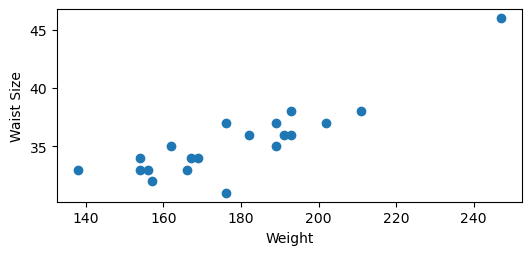

In [14]:
plt.figure(dpi=100, figsize = (6,2.5))
plt.scatter(dfgym.Weight, dfgym.Waist)
plt.xlabel('Weight')
plt.ylabel('Waist Size')

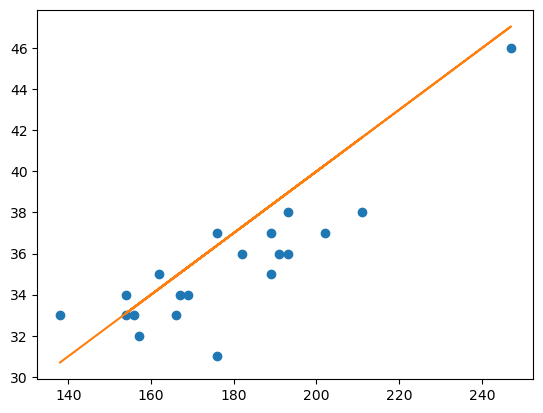

In [19]:
#y = b1*x1 + b2*x2 + ... + b0
m = .15
b = 10
x = dfgym.Weight
y = m*x+b
plt.figure()
plt.scatter(dfgym.Weight, dfgym.Waist)
plt.plot(x,y,c='C1')

In [20]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv')

In [22]:
subset1_gini = .330
subset1_n = 123
subset2_gini = .194
subset2_n = 900
total_gini = (subset1_gini*subset1_n+subset2_gini*subset2_n)/(subset1_n+subset2_n)
total_gini

0.21035190615835778

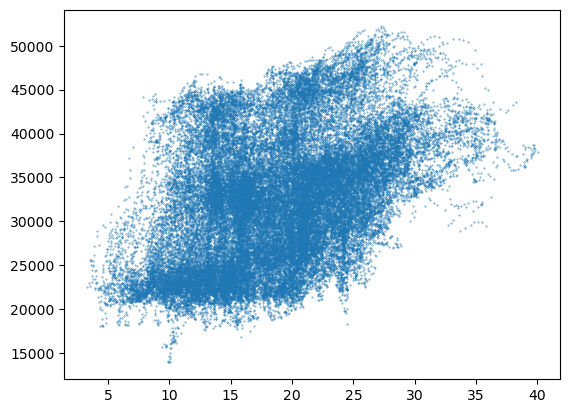

In [24]:
plt.scatter(df.Temperature,df['Zone 1 Power Consumption'],s=.1)

In [28]:
from sklearn import linear_model,model_selection
xval = model_selection.KFold(10,shuffle = True)
model = linear_model.LinearRegression()
features = ['Temperature','Humidity']
x = df[features]
y = df['Zone 1 Power Consumption']
results = model_selection.cross_validate(model,x,y, cv = xval, return_train_score=True,scoring='r2')
results

{'fit_time': array([0.00416088, 0.00495601, 0.00251698, 0.00413489, 0.00250888,
        0.00674105, 0.00276113, 0.00552082, 0.00441384, 0.0043869 ]),
 'score_time': array([0.00892615, 0.00398207, 0.00890017, 0.00351787, 0.00106025,
        0.0036757 , 0.00103903, 0.00298905, 0.00435305, 0.00857496]),
 'test_score': array([0.20276927, 0.20770118, 0.20599982, 0.21357661, 0.2050565 ,
        0.19185303, 0.20301027, 0.19474915, 0.20194793, 0.19995417]),
 'train_score': array([0.20292875, 0.20238401, 0.20254746, 0.20168422, 0.20266572,
        0.20404245, 0.20290832, 0.20379114, 0.20302745, 0.20325488])}

In [30]:
y_true = [1.6,2.2,2.2,1.5]
y_pred = [1.5,1.9,2.3,1.4]
sum_diffs = 0
for i in range(len(y_true)):
    diff = y_true[i] - y_pred[i]
    sum_diffs += diff**2
mean_diff = sum_diffs/len(y_pred)
np.sqrt(mean_diff) #RMSE

0.1732050807568878